In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import the regressor 
from sklearn import metrics
from sklearn.model_selection import  cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from keras.models import Sequential
import keras
from keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from numpy import array


In [2]:
def read_data_with_fields(filename,fields):
    df = pd.read_csv(filename,usecols = fields)
    return df

In [3]:
filename = 'Reduced_data_district_2.csv'
fields =['FEMALE_LIT','Percent_schools_with_boys_toilet','Percent_schools_with_playground',\
        'Percent_schools_with_drinking_water','Percent_schools_with_electricity','Percent_schools_with_Roads', 'Percent_single_teacher_schools']
df= read_data_with_fields(filename,fields)
# df = df[df.P_Enrollment_Rate.notnull()]
# df.P_Enrollment_Rate = pd.to_numeric(df.P_Enrollment_Rate, errors='coerce')
df = df.dropna()
y = df[fields[0]].values
X = df[fields[1:7]].values

# from sklearn.preprocessing import  MinMaxScaler
# sc= MinMaxScaler()
# X= sc.fit_transform(X)


In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((509, 6), (128, 6), (509,), (128,))

In [6]:
from sklearn.preprocessing import  MinMaxScaler
sc= MinMaxScaler()

In [7]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [75]:
model = Sequential()
model.add(Dense(10, input_dim=6, activation='relu'))
model.add(Dense(20,  activation='relu'))
model.add(Dense(10,  activation='relu'))
model.add(Dense(5,  activation='relu'))
model.add(Dense(1, activation='linear'))

In [104]:
keras.optimizers.Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['mean_absolute_percentage_error', 'mse'])

In [105]:
#To visualize neural network
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                70        
_________________________________________________________________
dense_16 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_17 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_18 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 6         
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [106]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=32,validation_split=0.15,validation_data=None,verbose=1)

Epoch 1/1000
14/14 [==============================] - 0s 12ms/step - loss: 84.2779 - mean_absolute_percentage_error: 11.9002 - mse: 84.2779 - val_loss: 140.9135 - val_mean_absolute_percentage_error: 13.4433 - val_mse: 140.9135
Epoch 2/1000
14/14 [==============================] - 0s 2ms/step - loss: 83.4564 - mean_absolute_percentage_error: 11.9297 - mse: 83.4564 - val_loss: 144.1147 - val_mean_absolute_percentage_error: 13.5521 - val_mse: 144.1147
Epoch 3/1000
14/14 [==============================] - 0s 2ms/step - loss: 83.3853 - mean_absolute_percentage_error: 11.8315 - mse: 83.3853 - val_loss: 138.3916 - val_mean_absolute_percentage_error: 13.3335 - val_mse: 138.3916
Epoch 4/1000
14/14 [==============================] - 0s 3ms/step - loss: 83.5196 - mean_absolute_percentage_error: 11.8973 - mse: 83.5196 - val_loss: 139.7634 - val_mean_absolute_percentage_error: 13.3721 - val_mse: 139.7634
Epoch 5/1000
14/14 [==============================] - 0s 3ms/step - loss: 83.6284 - mean_absolu

In [ ]:
model.predict(X_test)

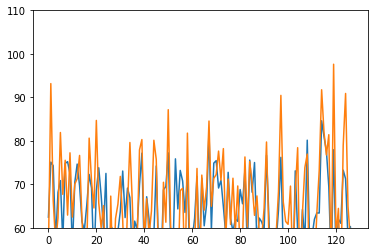

In [108]:
import matplotlib.pyplot as plt
plt.ylim(60, 110)
# plt.xlim(60, 110)

plt.plot(model.predict(X_test))
plt.plot(y_test)

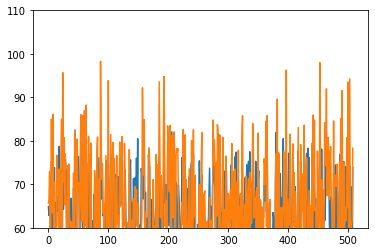

In [109]:
import matplotlib.pyplot as plt
plt.ylim(60, 110)
# plt.xlim(60, 110)

plt.plot(model.predict(X_train))
plt.plot(y_train)

In [110]:
y_pred = np.concatenate(model.predict(X_test)).ravel().tolist()

In [111]:
y_true = y_test.ravel().tolist()

In [112]:
from scipy.stats import pearsonr

In [113]:
pearsonr(y_pred, y_true)

(0.6629722499968644, 1.527088173138869e-17)

In [ ]:
y_test

In [94]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, model.predict(X_test))

86.961792936723

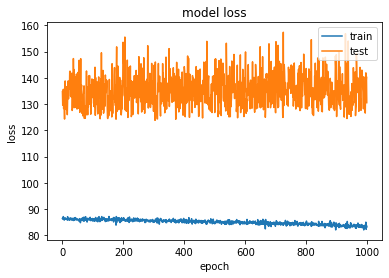

In [100]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [115]:
my_xvector =  np.array([65,60,96,57,87,7]).reshape(1, -1);
my_xvector = sc.fit_transform(my_xvector)

y_out = model.predict(my_xvector)
y_out

array([[75.75274]], dtype=float32)

In [ ]:
X_test

In [116]:
from sklearn.metrics import r2_score
print('R2 score:',r2_score(y_test, y_pred))

R2 score: 0.43627469465709345
